In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [4]:
ratings = pd.read_csv("rating.csv")

In [36]:
reviews = pd.read_csv('reviews.csv', index_col = 0)

In [37]:
ratings.head(2)

,OverallRating,Name,Datetime,VerifiedReview,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,L Keele,19th November 2023,True,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,Austin Jones,19th November 2023,True,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0


In [38]:
reviews.head(2)

,index,Datetime,Name,OverallRating,ReviewHeader,ReviewBody
0,0,19th November 2023,L Keele,1.0,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail stat...
1,1,19th November 2023,Austin Jones,3.0,"""do not upgrade members based on status""",I recently had a delay on British Airways from...


In [12]:
len(reviews.Name)-len(reviews.Name.drop_duplicates())

795

In [13]:
len(ratings.Name)-len(ratings.Name.drop_duplicates())

795

In [15]:
merged_df = pd.merge(reviews,ratings, on=['Datetime','Name','OverallRating']).drop()

In [75]:
merged_df.head(2)

,Unnamed: 0,index,Datetime,Name,OverallRating,ReviewHeader,ReviewBody,VerifiedReview,TypeOfTraveller,SeatType,...,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,0,19th November 2023,L Keele,1.0,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail stat...,True,Couple Leisure,Economy Class,...,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,1,19th November 2023,Austin Jones,3.0,"""do not upgrade members based on status""",I recently had a delay on British Airways from...,True,Business,Economy Class,...,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0


In [18]:
len(merged_df.Name)-len(merged_df.Name.drop_duplicates())

881

In [66]:
clean_df = merged_df.drop(merged_df.columns[[0,1]], axis=1)

<AxesSubplot:>

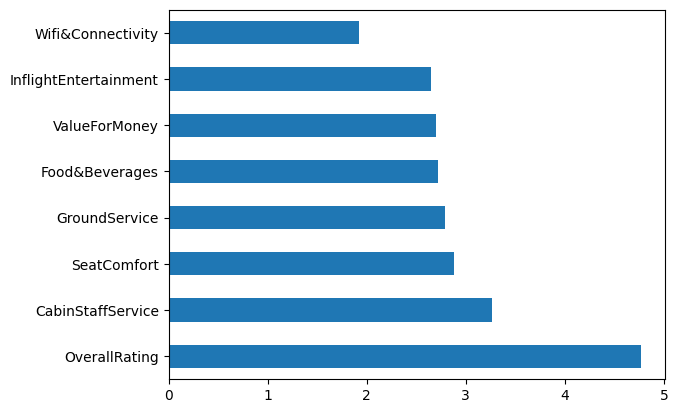

In [74]:
clean_df.describe().iloc[1].sort_values(ascending=False).plot(kind='barh')

In [50]:
clean_df.isna().sum() / clean_df.shape[1]

Datetime                   0.000000
Name                       0.000000
OverallRating              0.000000
ReviewHeader               0.000000
ReviewBody                 0.000000
VerifiedReview             0.000000
TypeOfTraveller            0.000000
SeatType                   0.000000
Route                      0.000000
DateFlown                  0.000000
SeatComfort                5.894737
CabinStaffService          6.473684
GroundService              3.578947
ValueForMoney              0.000000
Recommended                0.000000
Aircraft                  53.473684
Food&Beverages            20.157895
InflightEntertainment     61.263158
Wifi&Connectivity        124.000000
dtype: float64

<AxesSubplot:>

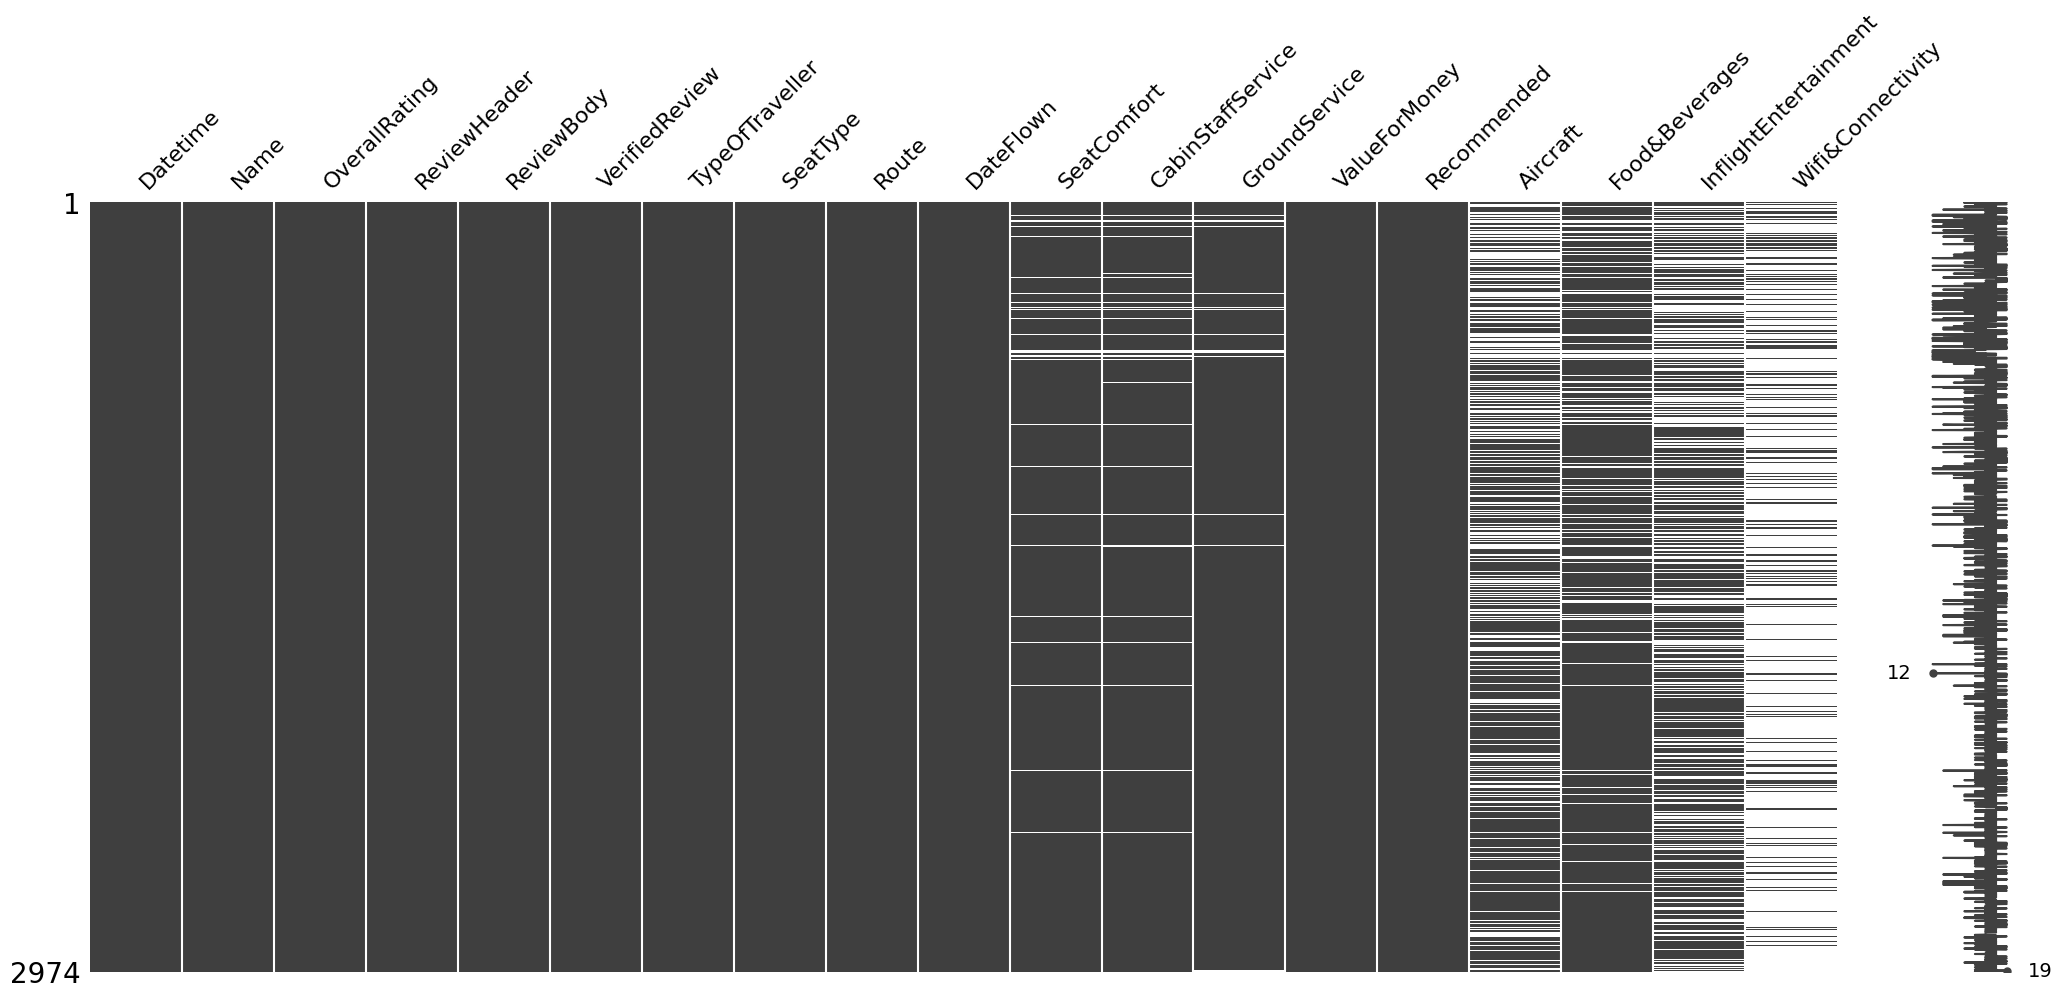

In [47]:
msno.matrix(clean_df)

In [ ]:
clean_df.drop('Aircraft', 'Wifi&Connectivity', 'InflightEntertainment')

In [22]:
clean_df.dropna(subset = ['OverallRating', 'TypeOfTraveller', 'SeatType', 'DateFlown', 'Route'], inplace=True)

In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 0 to 2983
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Datetime               2974 non-null   object 
 1   Name                   2974 non-null   object 
 2   OverallRating          2974 non-null   float64
 3   ReviewHeader           2974 non-null   object 
 4   ReviewBody             2974 non-null   object 
 5   VerifiedReview         2974 non-null   bool   
 6   TypeOfTraveller        2974 non-null   object 
 7   SeatType               2974 non-null   object 
 8   Route                  2974 non-null   object 
 9   DateFlown              2974 non-null   object 
 10  SeatComfort            2862 non-null   float64
 11  CabinStaffService      2851 non-null   float64
 12  GroundService          2906 non-null   float64
 13  ValueForMoney          2974 non-null   float64
 14  Recommended            2974 non-null   object 
 15  Airc

In [85]:
clean_df.head(2)

,Datetime,Name,OverallRating,ReviewHeader,ReviewBody,VerifiedReview,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,19th November 2023,L Keele,1.0,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail stat...,True,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,19th November 2023,Austin Jones,3.0,"""do not upgrade members based on status""",I recently had a delay on British Airways from...,True,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0


In [84]:
clean_df.TypeOfTraveller.value_counts().is_unique

True

In [28]:
clean_df.dtypes

Datetime                  object
Name                      object
OverallRating            float64
ReviewHeader              object
ReviewBody                object
VerifiedReview              bool
TypeOfTraveller           object
SeatType                  object
Route                     object
DateFlown                 object
SeatComfort              float64
CabinStaffService        float64
GroundService            float64
ValueForMoney            float64
Recommended               object
Aircraft                  object
Food&Beverages           float64
InflightEntertainment    float64
Wifi&Connectivity        float64
dtype: object

In [90]:
clean_df['Datetime'] = pd.to_datetime(clean_df['Datetime'])

In [91]:
clean_df['month'] = clean_df['Datetime'].dt.month

In [92]:
clean_df.head(2)

,Datetime,Name,OverallRating,ReviewHeader,ReviewBody,VerifiedReview,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,month
0,2023-11-19,L Keele,1.0,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail stat...,True,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN,11
1,2023-11-19,Austin Jones,3.0,"""do not upgrade members based on status""",I recently had a delay on British Airways from...,True,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0,11


<AxesSubplot:ylabel='month'>

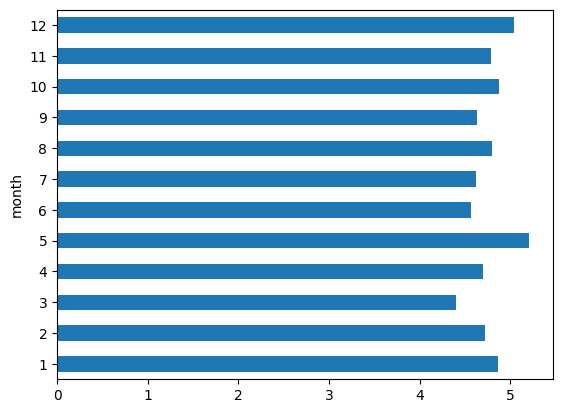

In [105]:
clean_df.groupby(['month']).OverallRating.mean().plot(kind='barh')

<AxesSubplot:ylabel='SeatType'>

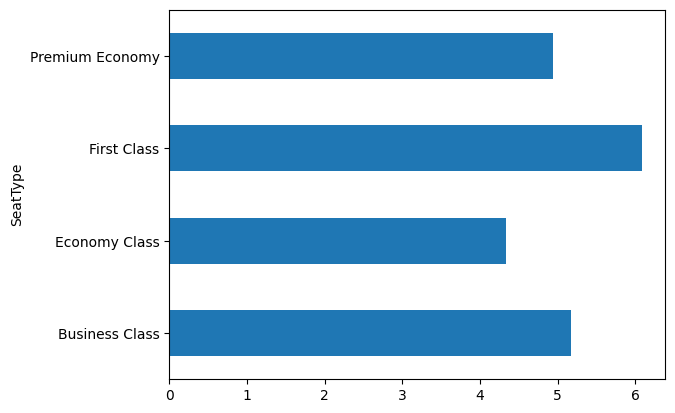

In [106]:
clean_df.groupby(['SeatType']).OverallRating.mean().plot(kind='barh')